# TIME SERIES ANALYSIS

### Task: Choose a dataset with a time component and perform time series analysis

- Embark on a time series analysis project using a dataset with a time component, specifically historical stock prices. The objective is to uncover patterns, trends, and insights from the temporal data, enabling a better understanding of stock price movements over time .

## Importing necessary libraries

In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Loading and Exploring the dataset



In [10]:
df = pd.read_csv('C:\\Users\\Jamun\\OneDrive\\Desktop\\power consumption.csv')

### Visualization of Time Series
(Exploratory Data Analysis)

In [11]:
df.columns

Index(['States', 'Regions', 'latitude', 'longitude', 'Dates', 'Usage'], dtype='object')

In [12]:
df.head

<bound method NDFrame.head of          States Regions   latitude  longitude             Dates  Usage
0        Punjab      NR  31.519974  75.980003  02-01-2019 00:00  119.9
1       Haryana      NR  28.450006  77.019991  02-01-2019 00:00  130.3
2     Rajasthan      NR  26.449999  74.639981  02-01-2019 00:00  234.1
3         Delhi      NR  28.669993  77.230004  02-01-2019 00:00   85.8
4            UP      NR  27.599981  78.050006  02-01-2019 00:00  313.9
...         ...     ...        ...        ...               ...    ...
1947     Punjab      NR  31.519974  75.980003  04-03-2019 00:00  106.9
1948    Haryana      NR  28.450006  77.019991  04-03-2019 00:00  124.0
1949  Rajasthan      NR  26.449999  74.639981  04-03-2019 00:00  240.9
1950      Delhi      NR  28.669993  77.230004  04-03-2019 00:00   71.1
1951         UP      NR  27.599981  78.050006  04-03-2019 00:00  271.2

[1952 rows x 6 columns]>

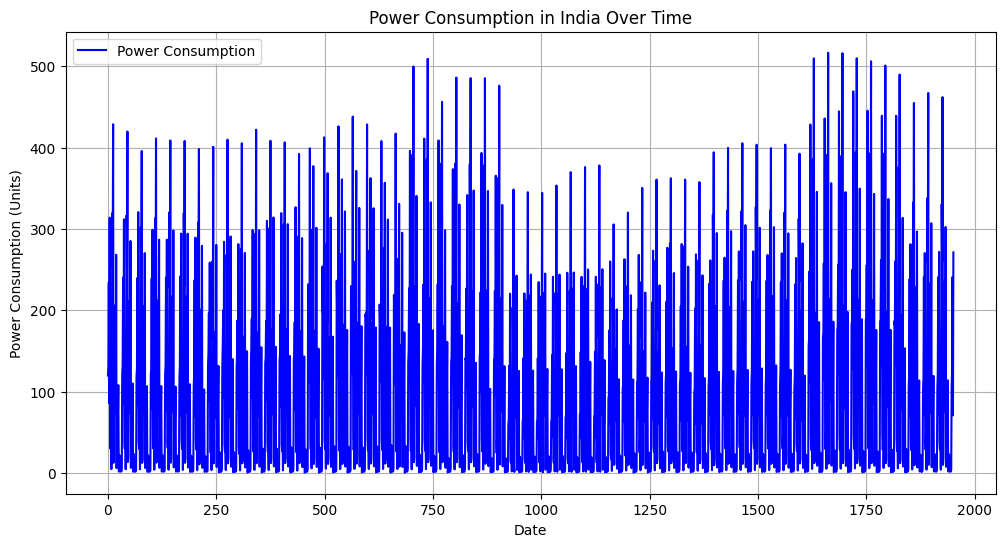

In [13]:

# Plot the power consumption
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Usage'], label='Power Consumption', color='blue')
plt.title('Power Consumption in India Over Time')
plt.xlabel('Date')
plt.ylabel('Power Consumption (Units)')
plt.legend()
plt.grid(True)
plt.show()


### Time Series Decomposition 

Decompose the time series into its components: trend, seasonality, and residuals. This helps in understanding the underlying patterns.

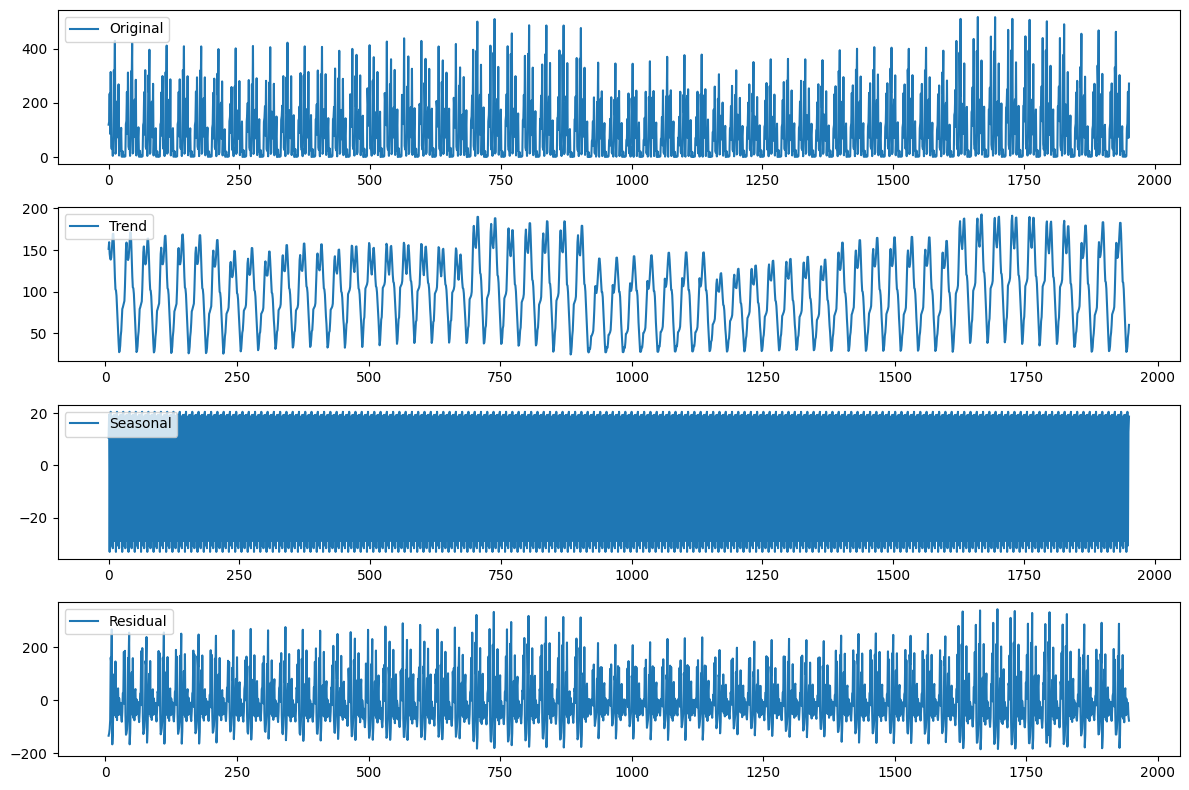

In [14]:
# Perform time series decomposition using sd with a specified period
decomposition = sd(df['Usage'], model='additive', period=12)  # Specify period as needed

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df.index, df['Usage'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(df.index, decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(df.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(df.index, decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


### Statistical Analysis

- Conduct statistical tests for stationarity, such as the Augmented Dickey-Fuller (ADF) test.
- Check autocorrelation and partial autocorrelation functions to identify lag values for potential autoregressive (AR) and moving average (MA) terms in later modeling.

In [15]:

# Perform the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(df['Usage'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# Interpret the results
if adf_result[1] < 0.05:
    print('The time series is likely stationary.')
else:
    print('The time series is likely non-stationary.')


ADF Statistic: -15.12448052394793
p-value: 7.380066611150555e-28
The time series is likely stationary.


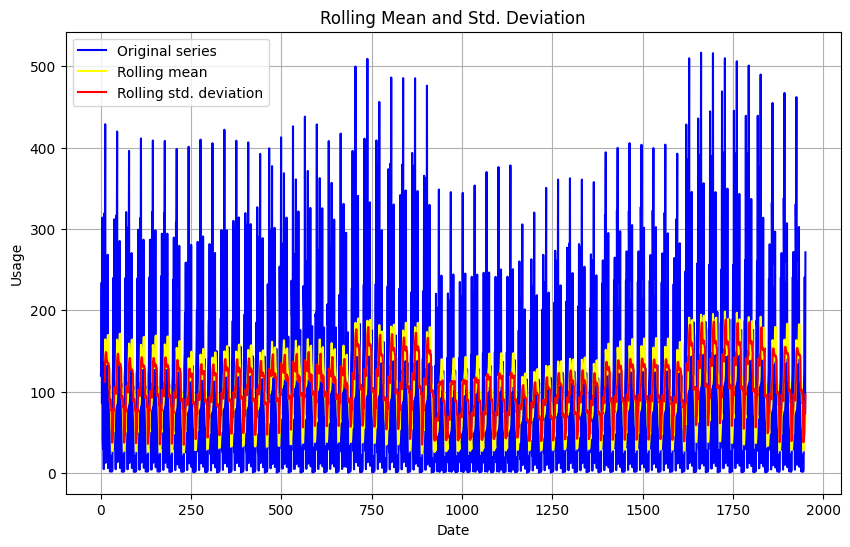

In [16]:
# Calculate rolling mean and rolling standard deviation for 'Usage' column with a window of 12
rolling_mean = df['Usage'].rolling(12).mean()
rolling_std = df['Usage'].rolling(12).std()

# Plot the original series, rolling mean, and rolling standard deviation
plt.figure(figsize=(10, 6))
plt.plot(df['Usage'], color='blue', label='Original series')
plt.plot(rolling_mean, color='yellow', label='Rolling mean')
plt.plot(rolling_std, color='red', label='Rolling std. deviation')

plt.legend(loc='best')
plt.title('Rolling Mean and Std. Deviation')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.grid(True)
plt.show()




#### Plotting autocorrelation

<Figure size 1200x600 with 0 Axes>

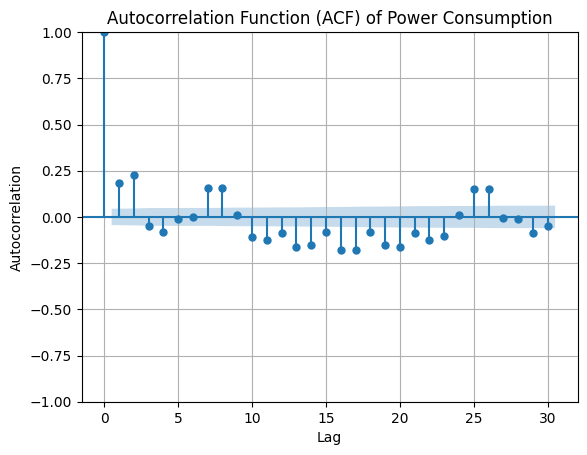

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation function (ACF) for 'Usage' column with maximum lag of 30
plt.figure(figsize=(12, 6))
plot_acf(df['Usage'], lags=30, alpha=0.05)
plt.title('Autocorrelation Function (ACF) of Power Consumption')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


#### Plotting Partial autocorrelation functions

<Figure size 1200x600 with 0 Axes>

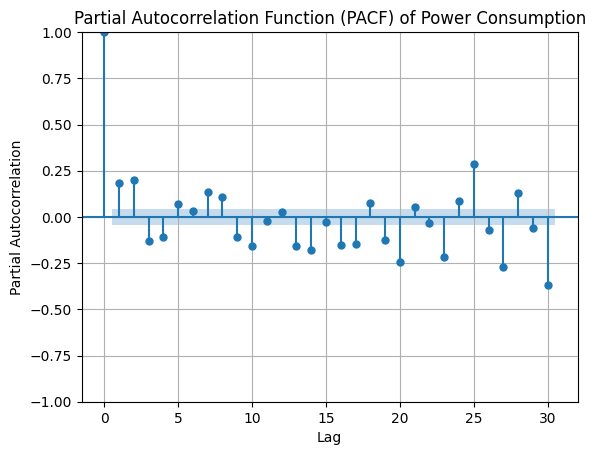

In [18]:

# Plot partial autocorrelation function (PACF) for 'Usage' column with maximum lag of 30 using Yule-Walker method
plt.figure(figsize=(12, 6))
plot_pacf(df['Usage'], lags=30, method='ywm')
plt.title('Partial Autocorrelation Function (PACF) of Power Consumption')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()


### Resampling the data 
(On a daily, weekly, and monthly basis and calculate the mean stock price)

In [24]:
# Convert the index to datetime
df.index = pd.to_datetime(df.index)

# Resample the 'Usage' data on a daily basis and calculate the mean usage
daily_mean_usage = df['Usage'].resample('D').mean()

# Print the daily variation in usage
print('Daily Variation in Usage:')
print(daily_mean_usage.head())



Daily Variation in Usage:
1970-01-01    100.575564
Freq: D, Name: Usage, dtype: float64


In [ ]:
# Resample the 'Usage' data on a weekly basis and calculate the mean usage
weekly_mean_usage = df['Usage'].resample('W').mean()

# Print the weekly variation in stock prices
print('Weekly Variation in Usage:')
print(weekly_mean_usage.head())


Weekly Variation in Usage:
Dates
2019-01-06    101.254545
2019-01-13     96.501299
2019-01-20    104.845022
2019-01-27    111.000866
2019-02-03     89.981818
Freq: W-SUN, Name: Usage, dtype: float64


In [ ]:
# Resample the 'Usage' data on a monthly basis and calculate the mean usage
monthly_mean_usage = df['Usage'].resample('M').mean()

# Print the monthly variation in stock prices
print('Monthly Variation in Usage:')
print(monthly_mean_usage.head())


Monthly Variation in Usage:
Dates
2019-01-31    102.328889
2019-02-28     97.953311
2019-03-31    100.842020
2019-04-30    107.785580
2019-05-31    102.755556
Freq: ME, Name: Usage, dtype: float64


C:\Users\Jamun\AppData\Local\Temp\ipykernel_25512\2437152210.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_usage = df['Usage'].resample('M').mean()


### Model Selection and Training (ARIMA)

- ARIMA stands for "AutoRegressive Integrated Moving Average"
- It combines three key components: AutoRegressive (AR), Integrated (I), and Moving Average (MA).
- ARIMA models are widely used for analyzing and forecasting time series data.

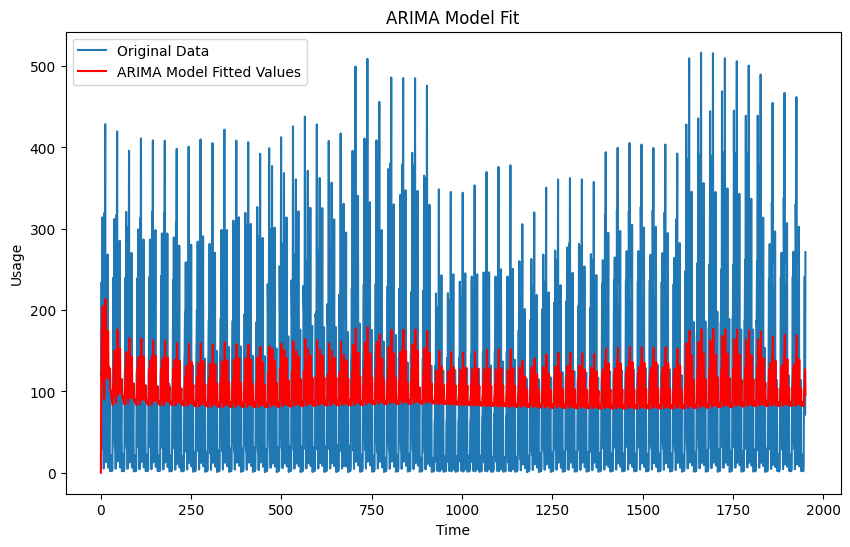

In [23]:

# Fit an ARIMA model to your data
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 1  # Moving average order

model = ARIMA(df['Usage'], order=(p, d, q))
fit_model = model.fit()

# Visualize the ARIMA model fit
plt.figure(figsize=(10, 6))
plt.plot(df['Usage'], label='Original Data')
plt.plot(fit_model.fittedvalues, label='ARIMA Model Fitted Values', color='red')
plt.title('ARIMA Model Fit')
plt.xlabel('Time')
plt.ylabel('Usage')
plt.legend()
plt.show()




#### Forecasting

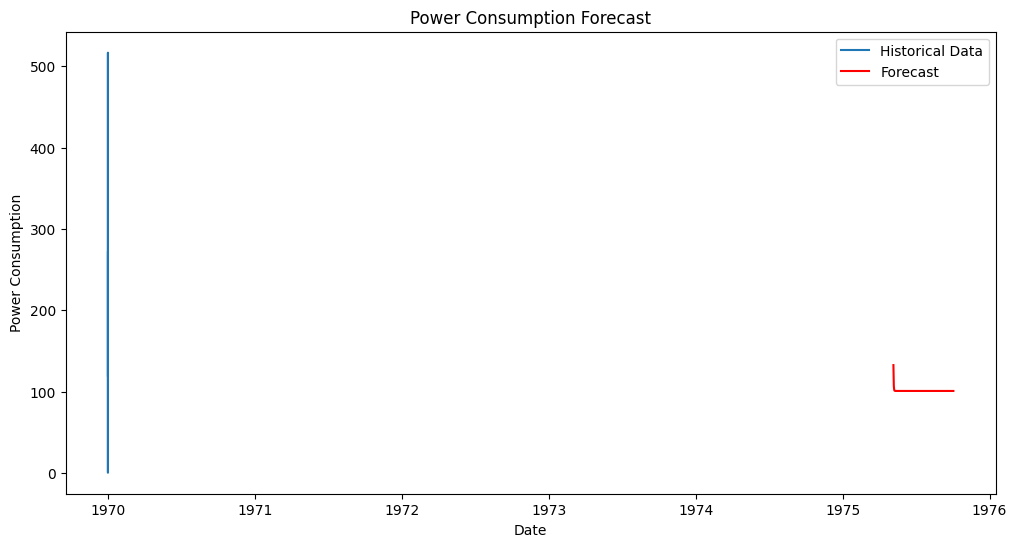

In [25]:
# Forecast future values
forecast = fit_model.get_forecast(steps=150)

# Visualization and Interpretation
plt.figure(figsize=(12, 6))
plt.plot(df['Usage'], label='Historical Data')  # Assuming 'Usage' is your power consumption data column
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.title('Power Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()


In [26]:

model_summary = fit_model.summary()

# Print the summary
print(model_summary)


                               SARIMAX Results                                
Dep. Variable:                  Usage   No. Observations:                 1952
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11958.554
Date:                Wed, 07 Feb 2024   AIC                          23923.108
Time:                        22:23:29   BIC                          23939.836
Sample:                             0   HQIC                         23929.258
                               - 1952                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1866      0.021      8.813      0.000       0.145       0.228
ma.L1         -0.9994      0.003   -303.221      0.000      -1.006      -0.993
sigma2      1.231e+04    337.251     36.489      0.0